In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

csvpath = "Resources\CensusData.csv"

sales_df = pd.DataFrame(pd.read_csv(csvpath))
sales_df.head()

,Year,United States,South,West
0,1963,560,199,141
1,1964,565,200,129
2,1965,575,210,129
3,1966,461,166,99
4,1967,487,179,119


In [5]:
csvpath2= "Resources\FedData.csv"
rate_df = pd.DataFrame(pd.read_csv(csvpath2))
rate_df
eff_fed_rate= rate_df.groupby(["Year"]).mean()['Effective Federal Funds Rate'].round(2)
eff_fed_rate_df = pd.DataFrame(eff_fed_rate)
eff_fed_rate_df = eff_fed_rate_df.drop([1954,1955,1956,1957,1958,1959,1960,1961,1962])
eff_fed_rate_df.head()

,Effective Federal Funds Rate
Year,
1963,3.18
1964,3.50
1965,4.07
1966,5.11
1967,4.22


In [6]:
sales_fed_funds_df = pd.merge(sales_df,eff_fed_rate_df, on="Year", how="outer")
sales_fed_funds_df=sales_fed_funds_df.rename(index=str, columns={"Effective Federal Funds Rate":"Fed Funds Rate"})
sales_fed_funds_df.head()

,Year,United States,South,West,Fed Funds Rate
0,1963,560,199,141,3.18
1,1964,565,200,129,3.50
2,1965,575,210,129,4.07
3,1966,461,166,99,5.11
4,1967,487,179,119,4.22


<IPython.core.display.Javascript object>


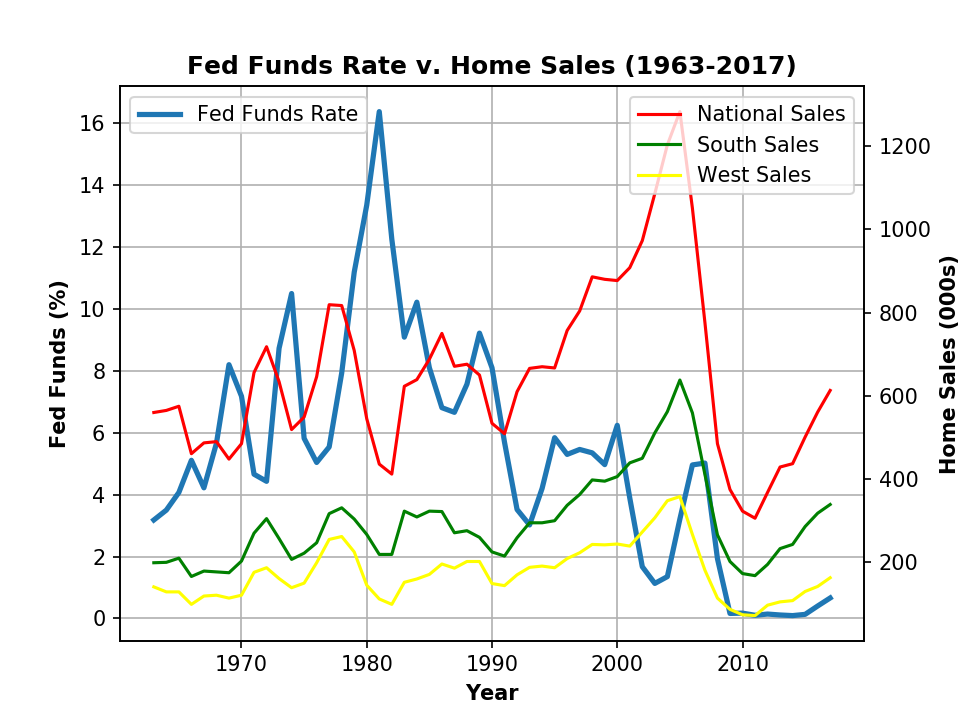

In [7]:
home_sales=[]
south_sales =[]
west_sales = []
for sale in sales_fed_funds_df["United States"]:
    int_sale=int(sale)
    home_sales.append(int_sale)
for sale in sales_fed_funds_df["South"]:
    int_south_sale=int(sale)
    south_sales.append(int_south_sale)
for sale in sales_fed_funds_df["West"]:
    int_west_sale=int(sale)
    west_sales.append(int_west_sale)
fig, ax1=plt.subplots()
x=np.arange(1963,2018)
n=sales_fed_funds_df['Fed Funds Rate']
ax1.plot(x,n,linewidth=2.5)
ax2=ax1.twinx()
ax2.plot(x,home_sales,color="r", label="National Sales")
ax2.plot(x,south_sales,color="g", label="South Sales")
ax2.plot(x,west_sales,color="yellow", label="West Sales")
ax1.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
ax1.set_title('Fed Funds Rate v. Home Sales (1963-2017)',fontweight="bold")
ax1.set_xlabel('Year', fontweight="bold")
ax1.set_ylabel('Fed Funds (%)',fontweight="bold")
ax2.set_ylabel('Home Sales (000s)',fontweight="bold")
plt.savefig('Graph Images/Fed_Funds_Home_Sales2.png')

In [9]:
sales_fed_funds_df["United States"][32] - sales_fed_funds_df["United States"][31]

-3

In [18]:
len(sales_fed_funds_df)

55

In [20]:
us_sales_chng = []
south_sales_chng = []
west_sales_chng = []
counter=0
for row in sales_fed_funds_df:
    us_sales_chng.append(sales_fed_funds_df["United States"][counter+1] - sales_fed_funds_df["United States"][counter])
    south_sales_chng.append(sales_fed_funds_df["South"][counter+1] - sales_fed_funds_df["South"][counter])
    west_sales_chng.append(sales_fed_funds_df["West"][counter+1] - sales_fed_funds_df["West"][counter])
    counter+=1
#us_sales_chng
#south_sales_chng
len(west_sales_chng)

5